## Import Libraries

Also need to download & install Graphviz. [Graphviz documentation](https://graphviz.org/documentation/)

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from IPython.display import Image   

import pydot 
import io

%matplotlib inline

In [5]:
notes_df = pd.read_csv('bwv29.8_notesChain_dp.csv')
notes_df.head()

,KEY,G4,F4,E4,A4,B4,D4,C4,F#4,B-4,...,B-3,C#3,D#3,F2,C5,D5,E5,F5,G5,C#4
0,"C0,G4",1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,"A4,G4",0.411765,0.411765,0.000000,0.000000,0.000000,0.058824,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.058824,0.058824,0.0,0.0,0.0,0.0
2,"G4,G4",0.411765,0.176471,0.000000,0.176471,0.058824,0.000000,0.0,0.058824,0.000000,...,0.0,0.0,0.0,0.0,0.117647,0.000000,0.0,0.0,0.0,0.0
3,"G4,F4",0.363636,0.090909,0.272727,0.000000,0.000000,0.000000,0.0,0.000000,0.272727,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
4,"F4,G4",0.400000,0.200000,0.000000,0.400000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


In [11]:
X = notes_df.drop('KEY',axis=1)
y = notes_df['KEY']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [12]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

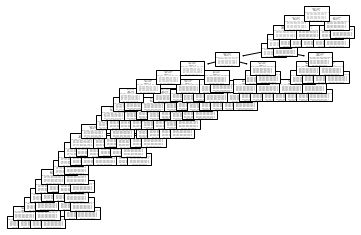

In [13]:
dtplot = tree.plot_tree(dtree)

In [16]:
predictions = dtree.predict(X_test)
features = list(notes_df.columns[1:])
dot_data =  io.StringIO()  
export_graphviz(dtree, out_file=dot_data, feature_names=features, filled=True, rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

In [15]:
#print(classification_report(y_test,predictions))
#print(confusion_matrix(y_test,predictions))